In [1]:
import pandas as pd
import seaborn as sns
import numpy as ny
import matplotlib.pyplot as plt
import warnings

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
labelencoder = preprocessing.LabelEncoder()

warnings.filterwarnings("ignore")

sns.set()


### Loading dataset

In [2]:
dataGamesSales = pd.read_csv("//home/rebecca/Documents/Projet_pythton-h3/Projet_evalution/Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
dataGamesSales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataGamesSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### Dropping na

In [5]:
## Dropping na
dataGamesSales = dataGamesSales.dropna()

In [6]:
dataGamesSales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


### Cleaning dataframe

In [7]:
## Encoding qualitative data to quantitative data

dataGamesSales['Platform'] = labelencoder.fit_transform(dataGamesSales['Platform'])
dataGamesSales['Genre'] = labelencoder.fit_transform(dataGamesSales['Genre'])
dataGamesSales['Publisher'] = labelencoder.fit_transform(dataGamesSales['Publisher'])
dataGamesSales['Developer'] = labelencoder.fit_transform(dataGamesSales['Developer'])

In [8]:
dataGamesSales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,12,2006.0,10,160,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,771,E
2,Mario Kart Wii,12,2008.0,6,160,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,771,E
3,Wii Sports Resort,12,2009.0,10,160,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,771,E
6,New Super Mario Bros.,2,2006.0,4,160,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,771,E
7,Wii Play,12,2006.0,3,160,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,771,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,3,2001.0,0,158,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,411,E
16677,Mortal Kombat: Deadly Alliance,3,2002.0,2,146,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,260,M
16696,Metal Gear Solid V: Ground Zeroes,5,2014.0,0,123,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,617,M
16700,Breach,5,2011.0,8,53,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,99,T


In [9]:
dataGamesSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   int64  
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   int64  
 4   Publisher        6825 non-null   int64  
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   int64  
 15  Rating           6825 non-null   object 
dtypes: float64(9), int64(4), object(3)
memory usage: 906.4+ KB


In [10]:
# So we see that User_Score row has object type even if the content can be transform to int without enconding the values
# We'll multiply User_Score by 10 sor we have them like xx/100

def convertUserScore(value):
    value = float(value)*10
    return float(value)
dataGamesSales.User_Score = dataGamesSales.User_Score.apply(convertUserScore)


In [11]:
# We'll change float to int in the dataframe

dataGamesSales['User_Score'] = dataGamesSales['User_Score'].astype(int)
dataGamesSales['User_Count'] = dataGamesSales['User_Count'].astype(int)
dataGamesSales['Year_of_Release'] = dataGamesSales['Year_of_Release'].astype(int)
dataGamesSales['Critic_Score'] = dataGamesSales['Critic_Score'].astype(int)
dataGamesSales['Critic_Count'] = dataGamesSales['Critic_Count'].astype(int)

# We know that the sales are in millions of unit so we gonna multiply it by 1000000

def convertSales(value):
    return value*1000000

dataGamesSales.NA_Sales = dataGamesSales.NA_Sales.apply(convertSales)
dataGamesSales.EU_Sales = dataGamesSales.EU_Sales.apply(convertSales)
dataGamesSales.JP_Sales = dataGamesSales.JP_Sales.apply(convertSales)
dataGamesSales.Other_Sales = dataGamesSales.Other_Sales.apply(convertSales)
dataGamesSales.Global_Sales = dataGamesSales.Global_Sales.apply(convertSales)

#Now we change them to int 
dataGamesSales['NA_Sales'] = dataGamesSales['NA_Sales'].astype(int)
dataGamesSales['EU_Sales'] = dataGamesSales['EU_Sales'].astype(int)
dataGamesSales['JP_Sales'] = dataGamesSales['JP_Sales'].astype(int)
dataGamesSales['Other_Sales'] = dataGamesSales['Other_Sales'].astype(int)
dataGamesSales['Global_Sales'] = dataGamesSales['Global_Sales'].astype(int)

In [12]:
dataGamesSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             6825 non-null   object
 1   Platform         6825 non-null   int64 
 2   Year_of_Release  6825 non-null   int64 
 3   Genre            6825 non-null   int64 
 4   Publisher        6825 non-null   int64 
 5   NA_Sales         6825 non-null   int64 
 6   EU_Sales         6825 non-null   int64 
 7   JP_Sales         6825 non-null   int64 
 8   Other_Sales      6825 non-null   int64 
 9   Global_Sales     6825 non-null   int64 
 10  Critic_Score     6825 non-null   int64 
 11  Critic_Count     6825 non-null   int64 
 12  User_Score       6825 non-null   int64 
 13  User_Count       6825 non-null   int64 
 14  Developer        6825 non-null   int64 
 15  Rating           6825 non-null   object
dtypes: int64(14), object(2)
memory usage: 906.4+ KB


### Correlation matrix

<AxesSubplot:>

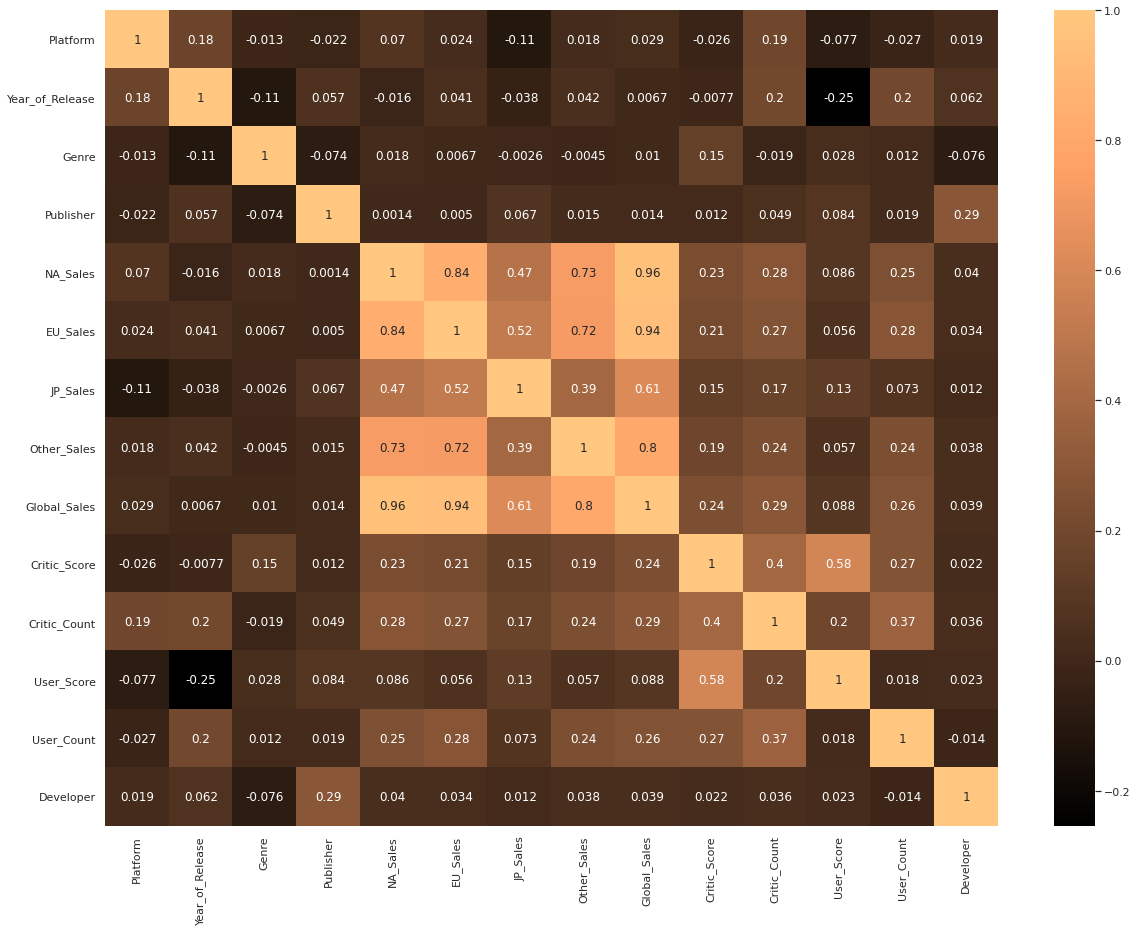

In [13]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(dataGamesSales.corr(), cmap = 'copper', annot = True)

In [14]:
# We willn't need tte name and the rating of the game
dataGamesSales = dataGamesSales.drop(['Name' , 'Rating'], axis =1)

### Isolation of features and targets

In [15]:
# Now that we have quantitative value we can isolate our targets
Y = dataGamesSales['User_Score']

# and our features
X = dataGamesSales.drop(['User_Score'], axis = 1)

In [16]:
X

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Developer
0,12,2006,10,160,41360000,28960000,3770000,8450000,82530000,76,51,322,771
2,12,2008,6,160,15680000,12760000,3790000,3290000,35520000,82,73,709,771
3,12,2009,10,160,15610000,10930000,3280000,2950000,32770000,80,73,192,771
6,2,2006,4,160,11280000,9140000,6500000,2880000,29800000,89,65,431,771
7,12,2006,3,160,13960000,9180000,2930000,2840000,28920000,58,41,129,771
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,3,2001,0,158,10000,0,0,0,10000,46,4,21,411
16677,3,2002,2,146,10000,0,0,0,10000,81,12,9,260
16696,5,2014,0,123,0,10000,0,0,10000,80,20,412,617
16700,5,2011,8,53,10000,0,0,0,10000,61,12,43,99


### Model Building

In [17]:
splits = train_test_split(X,Y, random_state = 0)

for each in splits: 
    print(each.shape)
scaler =StandardScaler()

(5118, 13)
(1707, 13)
(5118,)
(1707,)


### Random Forest

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0)
randomforest = rf(n_estimators = 35, max_features = 10, max_depth = 35)
randomforest.fit(X_train, Y_train)
Y_pred = randomforest.predict(X_test)
prob = randomforest.predict(X_test)

print(accuracy_score(Y_test, Y_pred)*100 , '%')

4.862331575864089 %


### KNN

In [22]:
#Hyperparametters input
knn = KNN(n_neighbors = 35, weights = 'distance',algorithm  = 'auto')
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

print(accuracy_score(Y_test, Y_pred)*100, '%')

3.9835969537199762 %


### SVC

In [23]:
#Hyperparametters input
svc = SVC(C=1.0 , kernel = 'poly', max_iter=-1)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

print(accuracy_score(Y_test, Y_pred)*100 , '%')

3.8078500292911546 %


### Feature Importance

In [131]:
#We gonna check importance of our features
randomforest.fit(X_train, Y_train)
importance = randomforest.feature_importances_
importance

array([0.05104611, 0.07187929, 0.06405281, 0.08034732, 0.08595308,
       0.07600941, 0.03454775, 0.05764839, 0.08885541, 0.0979626 ,
       0.09522131, 0.09653574, 0.09994078])

Sum of predictive power : 1.0


Text(0.5, 1.0, 'Features predictive power')

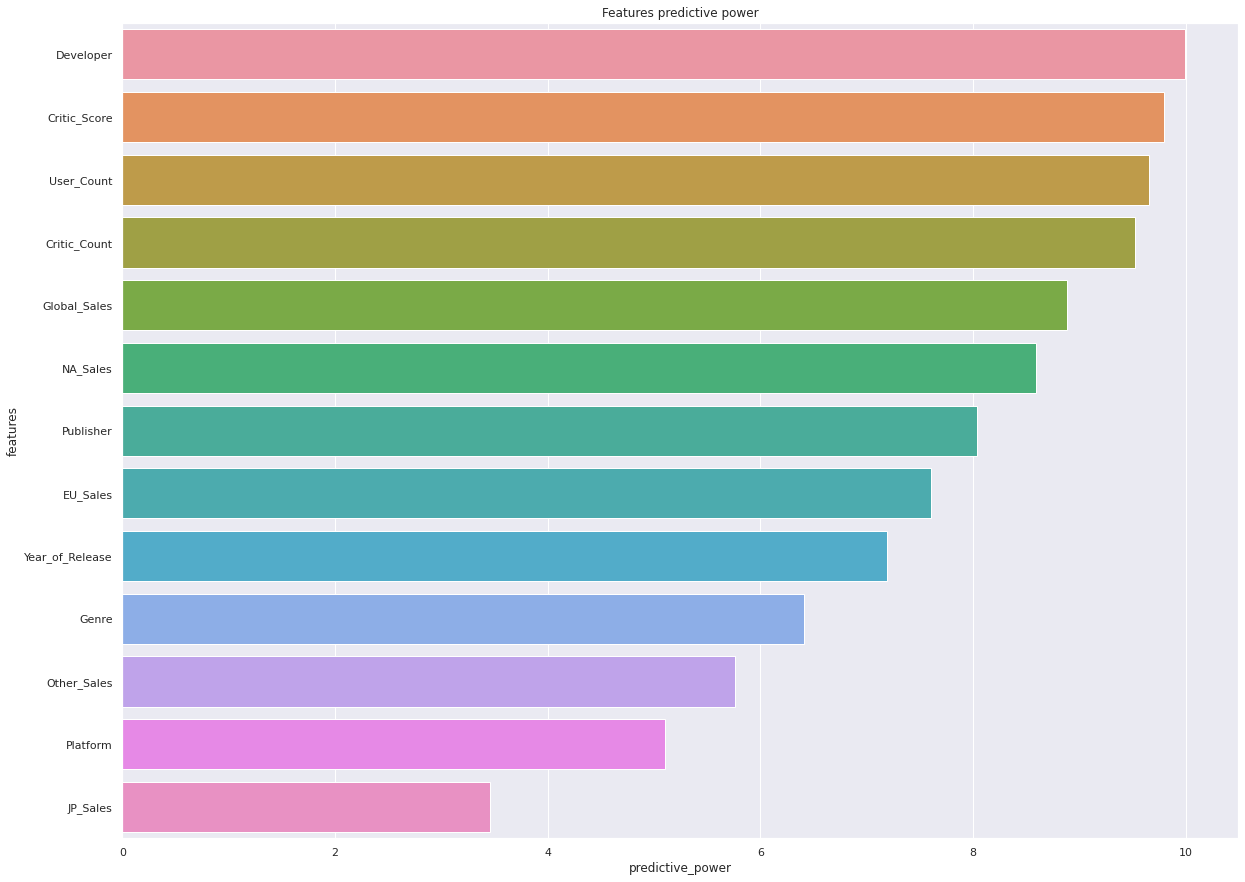

In [135]:
#Once we got our importance we'll see how the feature can modify the accuracy 

plt.figure(figsize=(20,15))

df = pd.DataFrame()
df['features'] = X_train.columns
df['predictive_power'] = importance
print('Sum of predictive power : {}'.format(df['predictive_power'].sum()))
df['predictive_power'] = df['predictive_power'].apply(lambda v : v*100)
df = df.sort_values(by ='predictive_power', ascending=False)
sns.barplot(df['predictive_power'], df['features']).set_title('Features predictive power')

In [136]:
df.sort_values(by = 'predictive_power', ascending=False)

,features,predictive_power
12,Developer,9.994078
9,Critic_Score,9.796260
11,User_Count,9.653574
10,Critic_Count,9.522131
8,Global_Sales,8.885541
4,NA_Sales,8.595308
3,Publisher,8.034732
5,EU_Sales,7.600941
1,Year_of_Release,7.187929
2,Genre,6.405281


### Confusion Matrix

In [137]:
classes = Y.astype('category').cat.categories.tolist()
print(classes)

[5, 6, 7, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]


In [138]:
def show_cm(cm, labels): 
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True)
    plt.show()

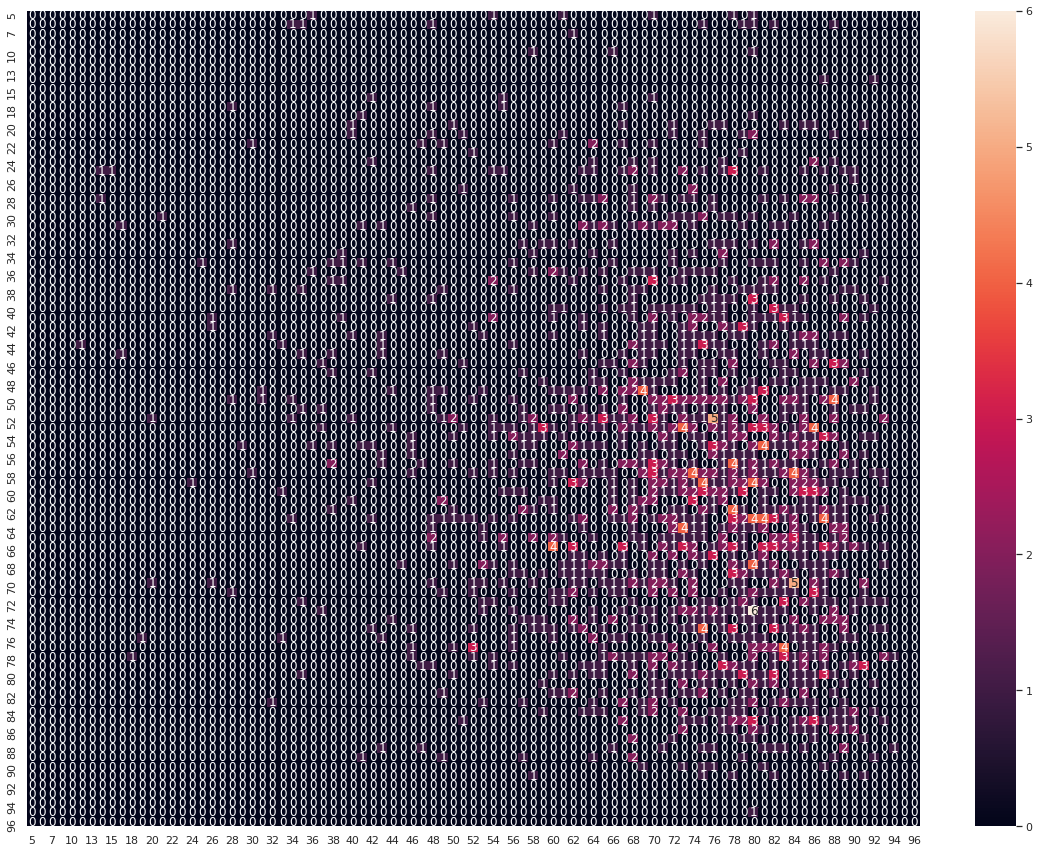

In [140]:
cm_train = confusion_matrix(Y_pred, Y_test, labels = classes)
show_cm(cm_train, classes)